In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots as _

from dynamics_modeling.utils import *

plt.style.use("ieee")

# Precipitation Data

> Beware: URLs, data formats, etc. can change, so this may be out of date.

## Daily Observations

Fetch from the Iowa Enviromental Mesonet (IEM) dataset of [daily observations on the Arizona ASOS network](https://mesonet.agron.iastate.edu/request/download.phtml?network=AZ_ASOS) using these options:

- `[PGA] PAGE MUNI (AMOS) (1973-Now)`
- Data: `All Available`
- Date Range
  - Start: `2012/01/01`
  - End: `2022/12/31`
- Timezone: `Coordinated Universal Time (UTC)`
- Download Options
  - Latitutde + Longitude: `No`
  - Elevation: `No`
  - Missing Data: `Use blank/empty string`
  - Trace Reports: `Use float 0.0001`
  - `View result data in web browser` (optional, but you get to see the data before downloading)

Exact Query URL: https://mesonet.agron.iastate.edu/cgi-bin/request/daily.py?network=AZ_ASOS&stations=PGA&year1=2012&month1=1&day1=1&year2=2022&month2=12&day2=31&var=precip_in&na=blank&format=csv

> Ensure you download/modify the file to have the `.csv` extension.

### Aggregate Daily, Weekly, and Monthly Averages


In [42]:
daily_df = load_daily_mesonet(
    "./dynamics_modeling/precip_daily_2012_2022.csv"
)  # Adjust path as necessary

avg_daily = daily_df.groupby(daily_df["time"].dt.dayofyear)["precip"].sum()
avg_weekly = daily_df.groupby(daily_df["time"].dt.isocalendar().week)["precip"].sum()
avg_monthly = daily_df.groupby(daily_df["time"].dt.month)["precip"].sum()

pd.DataFrame(avg_daily).to_csv("./dynamics_modeling/precip_daily.csv")
pd.DataFrame(avg_weekly).to_csv("./dynamics_modeling/precip_weekly.csv")
pd.DataFrame(avg_monthly).to_csv("./dynamics_modeling/precip_monthly.csv")

avg_daily.size, avg_weekly.size, avg_monthly.size

(366, 53, 12)

### Plot Rates


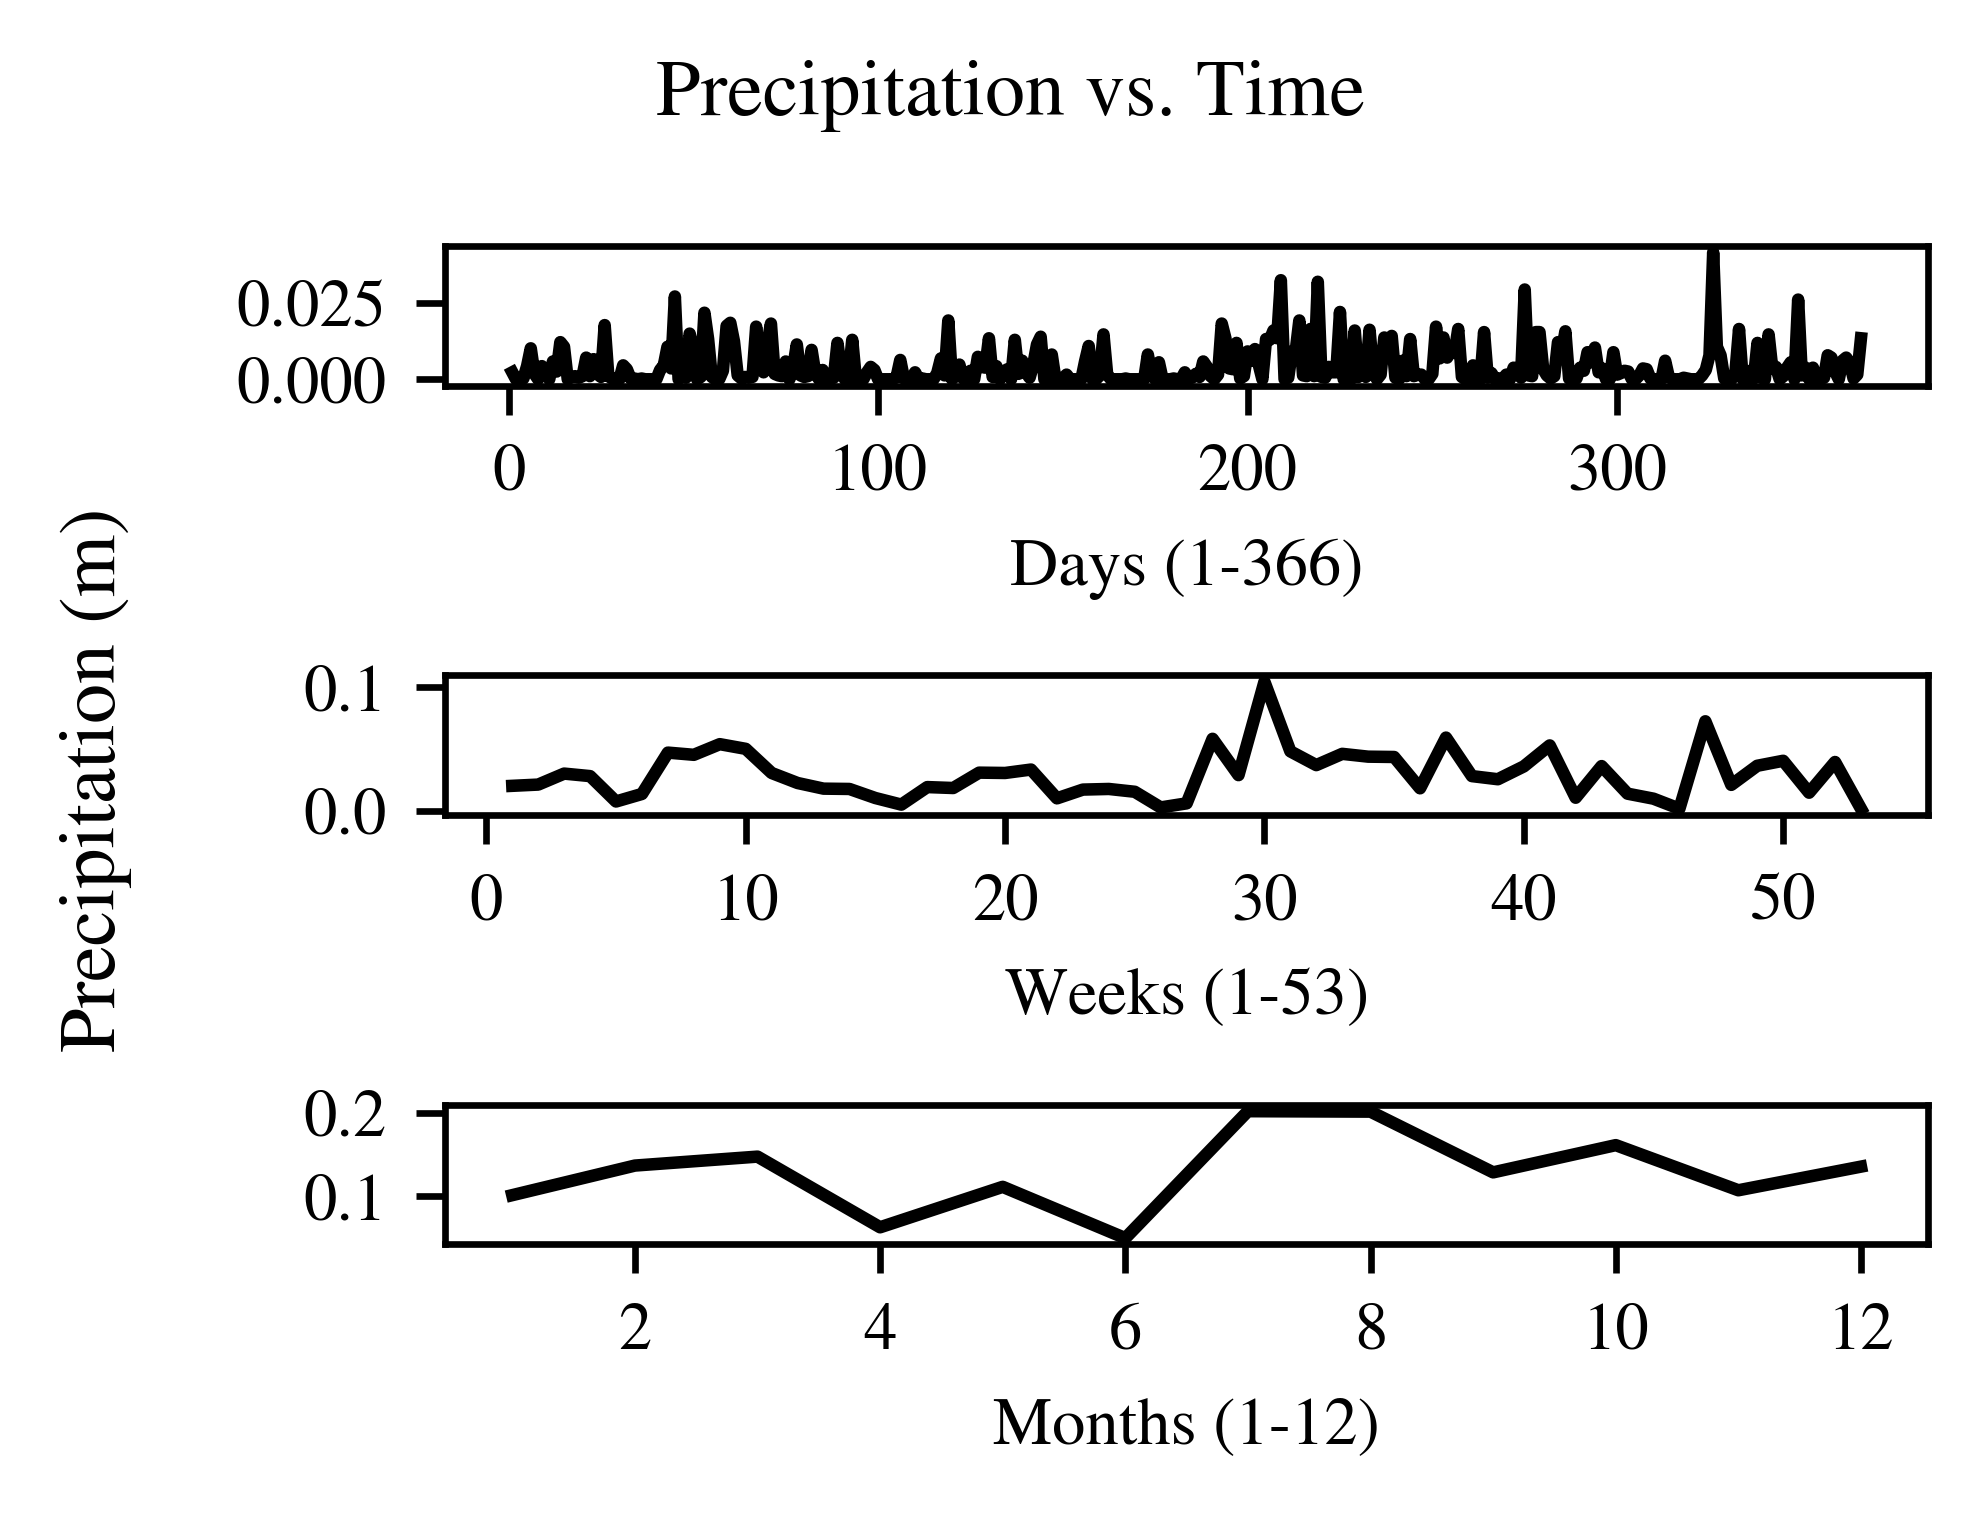

In [43]:
fig, ax = plt.subplots(3, 1)
fig.suptitle("Precipitation vs. Time")
fig.supylabel("Precipitation (m)")

ax[0].plot(avg_daily)
ax[0].set_xlabel(f"Days (1-{avg_daily.size})")
ax[1].plot(avg_weekly)
ax[1].set_xlabel(f"Weeks (1-{avg_weekly.size})")
ax[2].plot(avg_monthly)
ax[2].set_xlabel(f"Months (1-{avg_monthly.size})")

fig.tight_layout()

# Archive

## Hourly Observations

> We no longer use hourly observations as they are too granular. We also use more recent data for better accuracy.

Fetch from the Iowa Enviromental Mesonet (IEM) dataset of [hourly observations on the Arizona ASOS network](https://mesonet.agron.iastate.edu/request/download.phtml?network=AZ_ASOS) using these options:

- `[PGA] PAGE MUNI (AMOS) (1973-Now)`
- Data: `All Available`
- Date Range\*
  - Start: `1957/01/01`
  - End: `2005/12/31`
- Timezone: `Coordinated Universal Time (UTC)`
- Download Options
  - Latitutde + Longitude: `No`
  - Elevation: `No`
  - Missing Data: `Use blank/empty string`
  - Trace Reports: `Use float 0.0001`
  - `View result data in web browser` (optional, but you get to see the data before downloading)

Exact query URL: https://mesonet.agron.iastate.edu/cgi-bin/request/asos.py?station=PGA&data=all&year1=1957&month1=1&day1=1&year2=2005&month2=12&day2=31&tz=Etc%2FUTC&format=onlycomma&latlon=no&elev=no&missing=empty&trace=0.0001&direct=no&report_type=3&report_type=4

> \*Supposedly because of availability limitations, data actually starts at 1973/2/1. Even then, many values may be missing.
